In [39]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [54]:
## loading of data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [55]:
## normalizing input data from 0 to 255 to -0.5 to 0.5
X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)
X_train=X_train/255-0.5
X_test=X_test/255-0.5

In [56]:
## reshaping image from size of (28,28) to (784,)
X_train=X_train.reshape((len(X_train),-1))
X_test=X_test.reshape((len(X_test),-1))

In [58]:
# #calculating covariance for every 784 features and making (784,784 )matrix
mean_along_features=np.mean(X_train,axis=0)
subtacted_mean=np.zeros(X_train.shape)
for i in range(len(mean_along_features)):
    subtacted_mean[:,i]=X_train[:,i]-mean_along_features[i]
covariance_matrix=np.dot(np.transpose(subtacted_mean),subtacted_mean)/len(subtacted_mean)

In [60]:
## decomposing the covariance matrix into three martix U,V and W 
[u,v,w]=np.linalg.svd(covariance_matrix)

In [61]:
## out of 784 principal components only three is choosen 
final_feature_vector=np.dot(X_train,u[:,0:3])

In [62]:
## caclulationg total variation of those three prinicpal components
variation=1-(np.sum(v[0:3])/np.sum(v))
print(variation)

0.7703032281360789


Text(0, 0.5, 'PC3')

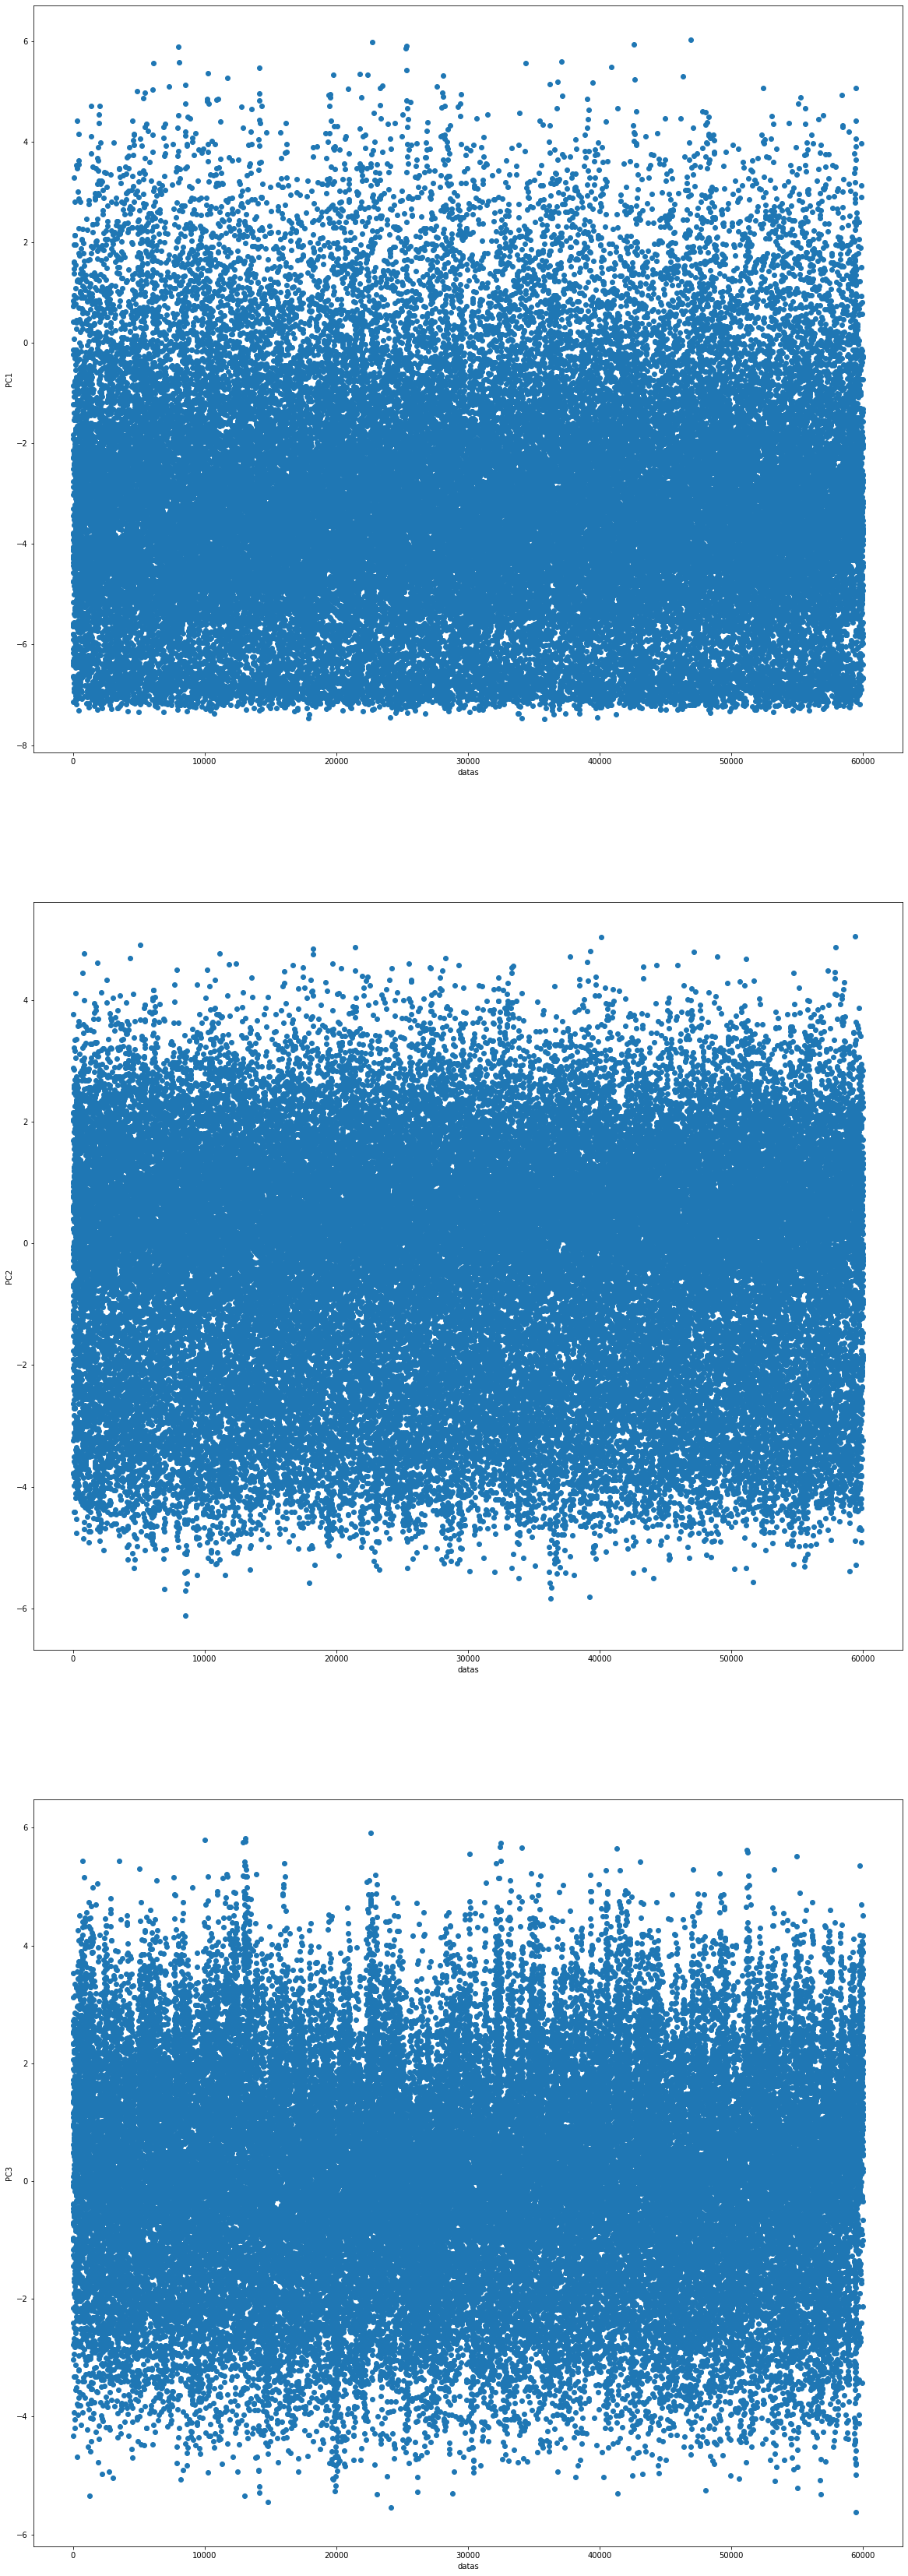

In [85]:
figure_=plt.figure(figsize=(20, 60))
axs = figure_.subplots(3)
axs[0].scatter(np.array(range(0,len(final_feature_vector))),final_feature_vector[:,0])
axs[0].set_xlabel('datas')
axs[0].set_ylabel('PC1')
axs[1].scatter(np.array(range(0,len(final_feature_vector))),final_feature_vector[:,1])
axs[1].set_xlabel('datas')
axs[1].set_ylabel('PC2')
axs[2].scatter(np.array(range(0,len(final_feature_vector))),final_feature_vector[:,2])
axs[2].set_xlabel('datas')
axs[2].set_ylabel('PC3')

Text(0, 0.5, 'PC3')

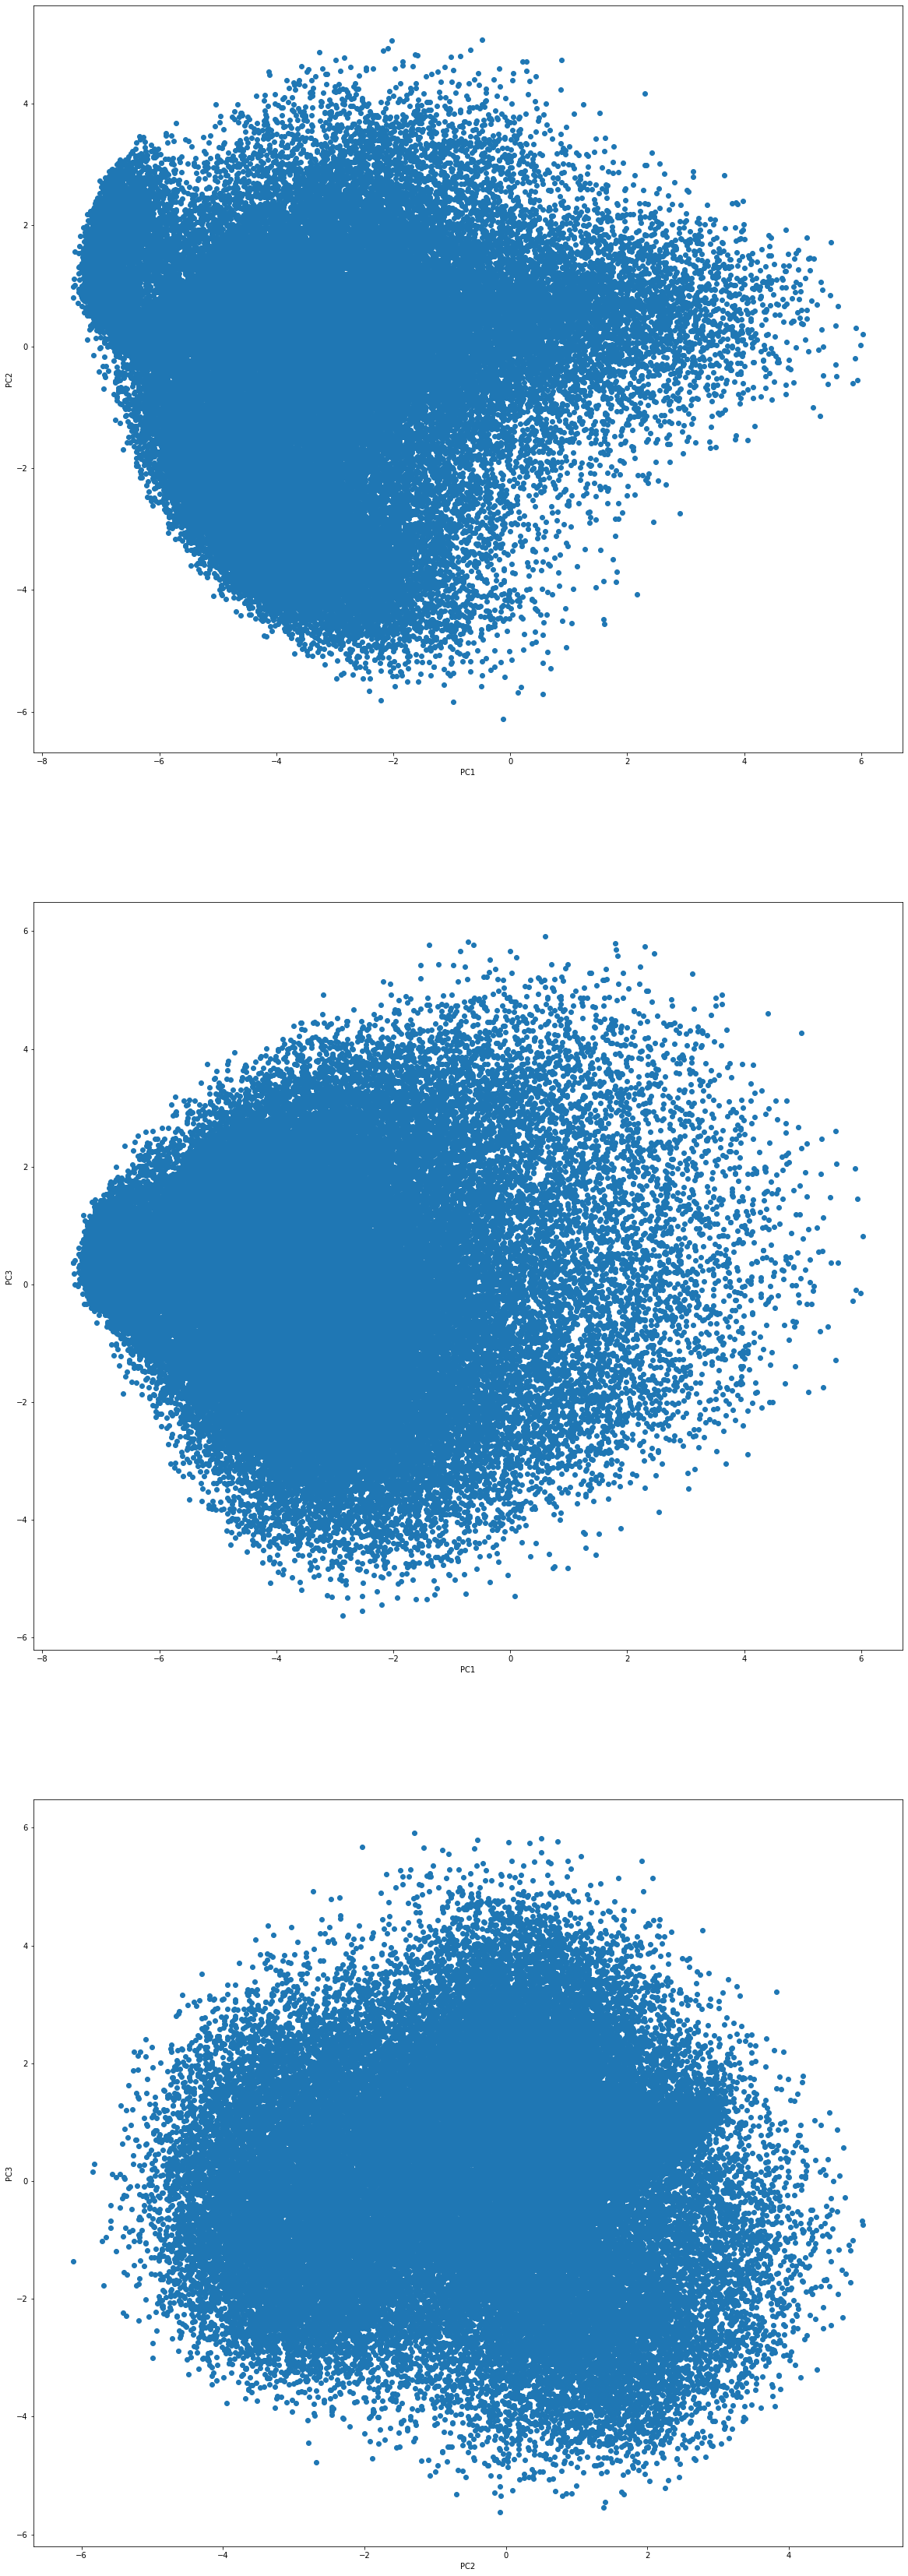

In [83]:
figure_=plt.figure(figsize=(20, 60))
axs = figure_.subplots(3)
axs[0].scatter(final_feature_vector[:,0],final_feature_vector[:,1])
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[1].scatter(final_feature_vector[:,0],final_feature_vector[:,2])
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC3')
axs[2].scatter(final_feature_vector[:,1],final_feature_vector[:,2])
axs[2].set_xlabel('PC2')
axs[2].set_ylabel('PC3')